In [8]:
from nltk.corpus import wordnet as wn

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aburgueno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Conda install graphviz in anaconda prompt
# Add graphviz folder and graphviz\dot.exe in path

In [11]:
import graphviz

# HYPERNYMS AND SEMANTIC TREES

In [12]:
# All Hypernyms of several synsets with its branches

def td_semantic_tree (s_list):
    dot = graphviz.Digraph(strict=True)
    for i in s_list:
        item = i + '.n.01'
        chain = [i]
        an = wn.synset(item)

        hyp = an.hypernyms()
        while hyp != []:
            chain.append(hyp[0].name().split(".")[0])
            hyp = hyp[0].hypernyms()

        chain = list(reversed(chain)) # List reversed to make the tree top-down
        
        for i in chain:
            dot.node(i)

        for i in range(len(chain)-1):
            dot.edge(chain[i], chain[i+1])

    return(dot)

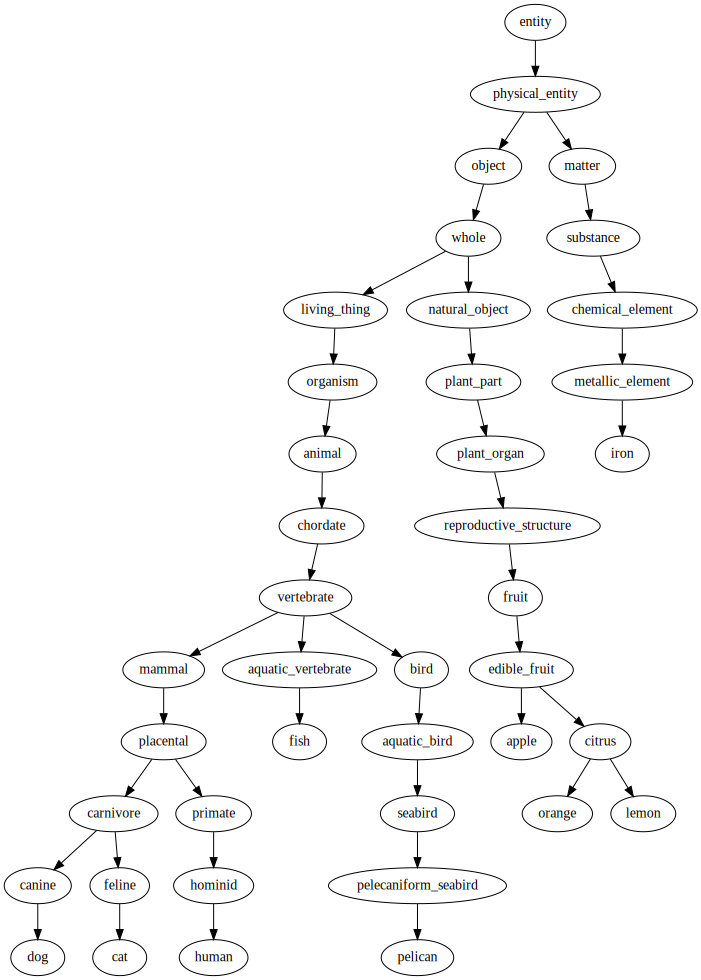

In [13]:
td_semantic_tree(['dog', 'cat', 'human', 'fish', 'apple', 'iron', 'pelican', 'orange', 'lemon'])

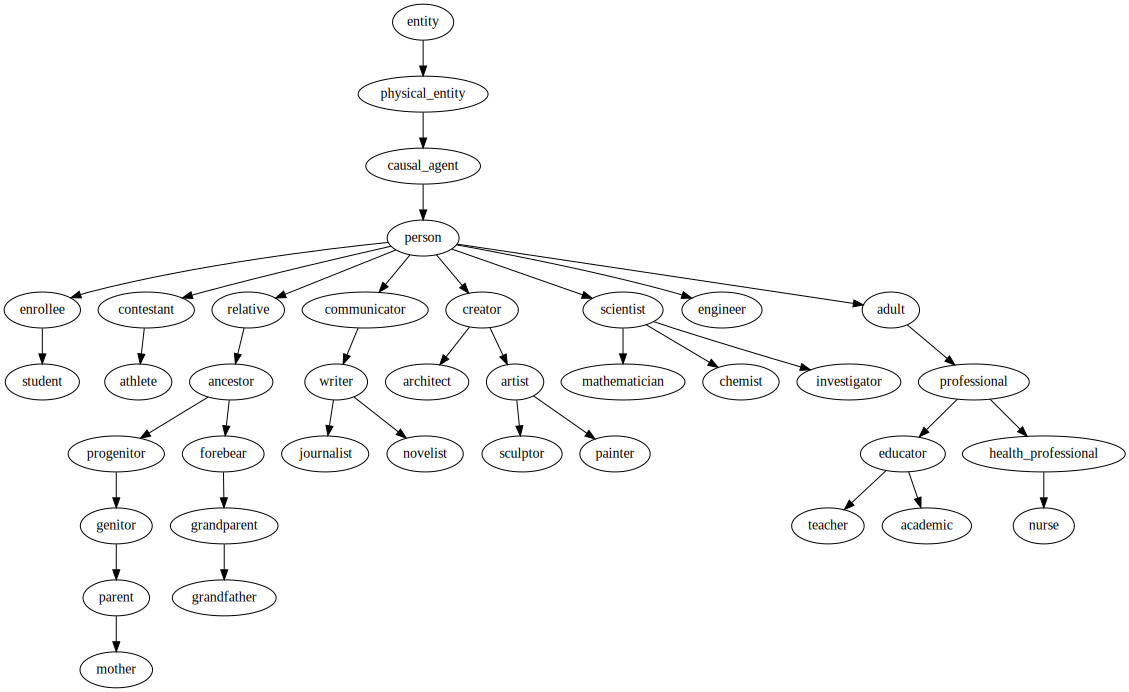

In [14]:
td_semantic_tree(['student', 'athlete', 'mother', 'journalist', 'architect', 'mathematician', 'engineer', 'grandfather', 'teacher', 'nurse', 'academic', 'chemist', 'investigator','sculptor', 'painter', 'novelist'])

# PATH SIMILARITY IN SEMANTIC TREE

In [18]:
# Path similarity = 1/(edges+1)

dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

print(dog.path_similarity(cat))

0.2


In [17]:
dog = wn.synset('dog.n.01')
pelican = wn.synset('pelican.n.01')

print(dog.path_similarity(pelican))

0.1


In [20]:
# Other types of similarity
print(dog.lch_similarity(cat))
print(dog.lch_similarity(pelican))

2.0281482472922856
1.3350010667323402


In [21]:
print(dog.wup_similarity(cat))
print(dog.wup_similarity(pelican))

0.8571428571428571
0.6666666666666666


# HYPONYM CLOUDS

In [22]:
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [69]:
def hyponyms (s_list):
    dot = graphviz.Digraph(engine='fdp',strict=True) #others are circo, neato, twopi, dot...
    for word in s_list:
        item = word + '.n.01'
        chain = []
        
        an = wn.synset(item)
        hyp = an.hyponyms()
        
        for i in range(len(hyp)):
            chain.append(hyp[i].name().split(".")[0])
        
        dot.node(word)

        for i in chain:
            dot.node(i)

        for i in range(len(chain)):
            dot.edge(word, chain[i]) 

    return(dot)

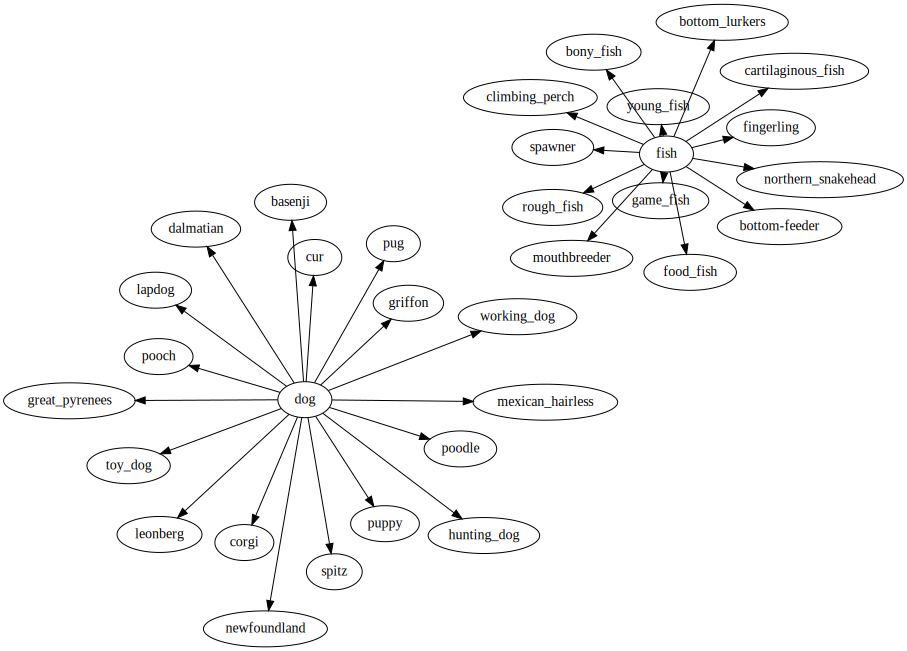

In [74]:
hyponyms(['dog','fish'])

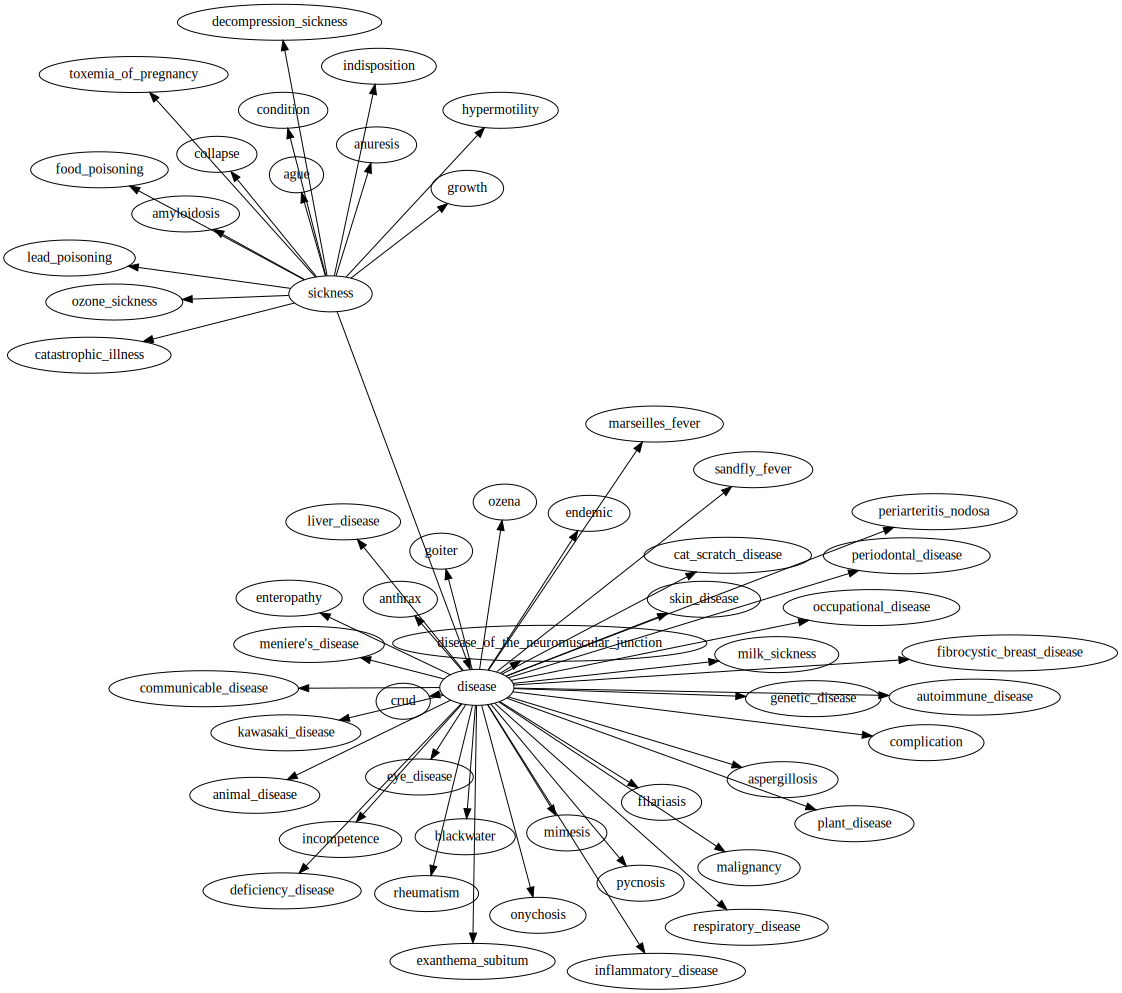

In [79]:
hyponyms(['sickness','disease'])